<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/ejercicio2parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sistema de digitalización para la señal propuesta para un microprocesador de 3 bits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
#cálculo de cero y pendiente
ymin=-5  #valor minimo de tension
ymax=5  #valor maximo de tension
def pendiente(x,ymin,ymax):
  xmax=max(x)
  xmin=min(x)
  m=(ymax-ymin)/(xmax-xmin) #pendiente
  c=ymin-m*xmin #intercepto
  y=m*x+c #señal generada
  return y

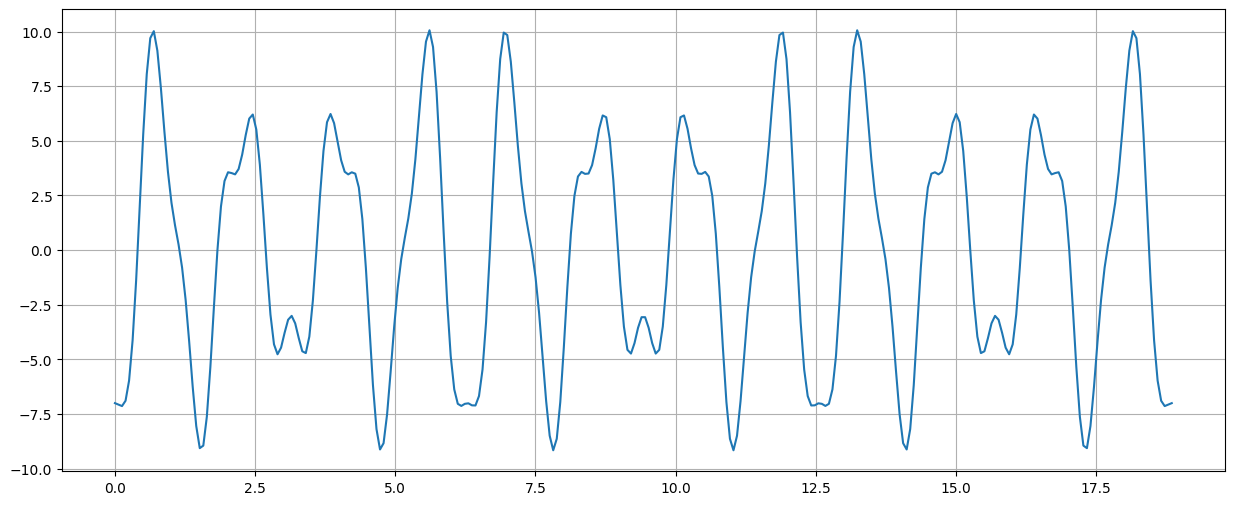

In [3]:
ti=0
tf=6*np.pi
vt = np.linspace(ti,tf,num=300)  #Vector tiempo para la señal - Número de muestras (num =300)
x = 7*np.sin(4*vt-(np.pi/2))-2*np.cos(5*vt)+2*np.cos(10*vt) #todas las señales
plt.figure(figsize=(15,6)) #para el tamaño de la gráfica :D
plt.plot(vt,x)
plt.grid()

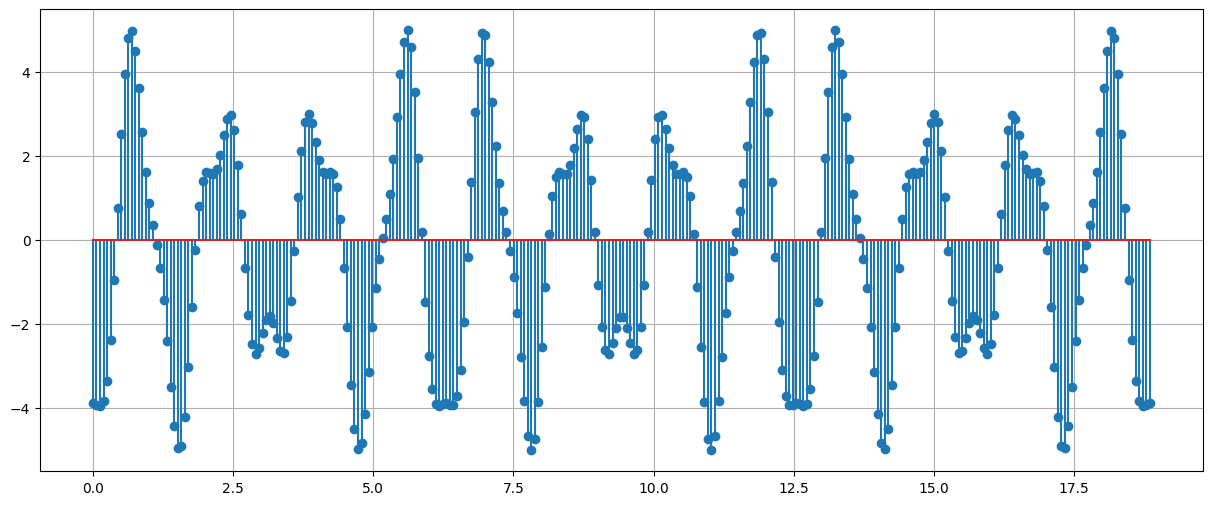

In [4]:
x2 = pendiente(x,ymin,ymax) #se invoca la función de cero y pendiente para discretizar la señal propuesta
plt.figure(figsize=(15,6))
plt.stem(vt,x2)
plt.grid()

In [5]:
#para cuantizar la señal
nbits=3
rmin=-5
rmax=5
ve=np.linspace(rmin,rmax,2**nbits)
d=cdist(x2.reshape(-1,1),ve.reshape(-1,1))
ind=np.argmin(d,axis=1)

In [6]:
def cuantizar(x3,ve2):
  Ne=ve2.shape[0]
  dn=cdist(x3.reshape(-1,1),ve2.reshape(-1,1))
  ind=np.argmin(dn)
  return ve2[ind]

In [7]:
for i in range(x2.shape[0]):
  if i==0:
    x3=cuantizar(x2[i],ve)
  else:
    x3=np.append(x3,cuantizar(x2[i],ve))

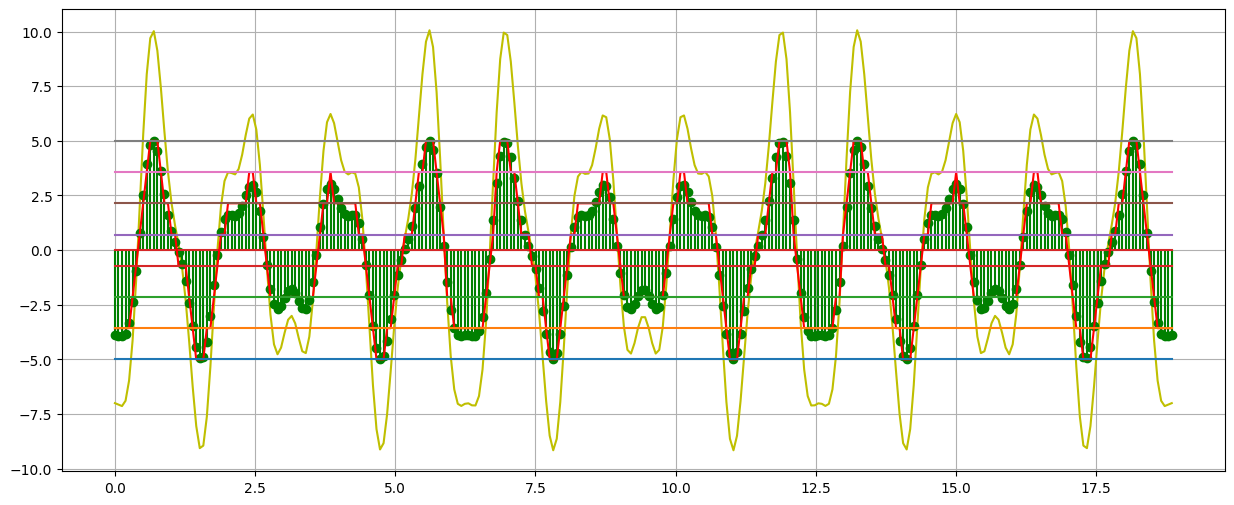

In [8]:
plt.figure(figsize=(15,6))
plt.plot(vt,x,c='y')
plt.stem(vt,x2,linefmt='g')
plt.plot(vt,x3,c='r')

for v in ve:
  plt.plot(vt,v*np.ones(len(vt)))

plt.grid()